In [1]:

%matplotlib notebook

In [2]:
import pylab as pl
import numpy as np

### this code snippet will load the next cell with the global preamble

```
with open('preamble.py', 'r') as fh:
    preamble = fh.read()
get_ipython().set_next_input(preamble)
```

In [3]:
%matplotlib inline
import numpy as np
from astropy import units as u
import pylab as pl
pl.rcParams['figure.figsize'] = (16,8)
import sys
import glob
sys.path.append('/lustre/naasc/users/aginsbur/repos/reduction/reduction/')
import imp, diagnostic_images
imp.reload(diagnostic_images)
from diagnostic_images import load_images, show
from spectral_cube import SpectralCube
import selfcal_heuristics
import spectral_cube
import os
os.chdir("/lustre/naasc/projects/ALMA_IMF/2017.1.01355.L/imaging_results")

In [4]:
import casatools
tb = casatools.table()
msmd = casatools.msmetadata()
ms = casatools.ms()

In [7]:
caltable = '../W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_phase2_int.cal/'
tb.open(caltable)
data = {col: tb.getcol(col) for col in tb.colnames() if col not in ("WEIGHT",)}
data['ANGLE'] = np.angle(data['CPARAM'])
tb.close()

True

In [8]:
okfields,notokfields = selfcal_heuristics.goodenough_field_solutions(caltable,
                                                                     minsnr=5)
print(okfields, notokfields)

[4, 6, 7, 17, 18, 32] [1, 2, 3, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37]


In [9]:
fieldOKmask = np.isin(data['FIELD_ID'], okfields)

In [10]:
msfile = '../W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_selfcal.ms/'

In [11]:
fids = np.unique(data['FIELD_ID'])
print(fids)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37]


In [12]:
oids = np.unique(data['OBSERVATION_ID'])
print(oids)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [24]:
uoids = np.unique(data['OBSERVATION_ID'])

In [13]:
spwids = np.unique(data['SPECTRAL_WINDOW_ID'])
print(spwids)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77]


In [14]:
# which observations contain which fields?
for oid in oids:
    oid_match = data['OBSERVATION_ID'] == oid
    has_fid = [fid for fid in fids if np.any((data['FIELD_ID'] == fid) & oid_match)]
    print(f"OID {oid} has fields {has_fid}")

OID 0 has fields [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
OID 1 has fields [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
OID 2 has fields [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
OID 3 has fields [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
OID 4 has fields [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
OID 5 has fields [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
OID 6 has fields [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
OID 7 has fields [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
OID 8 has fields [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
OID 9 has fields [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
OID 10 has fields [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
OID 11 has fields [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
OID 12 has fields [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


fids_12m = [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44]fids_7m = [0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]


In [15]:
fids_12m = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]

In [ ]:
fids_7m = [1,2,3,4,5,6,7,8,9,10]

In [16]:
print({col: data[col].shape for col in data})

{'TIME': (2038480,), 'FIELD_ID': (2038480,), 'SPECTRAL_WINDOW_ID': (2038480,), 'ANTENNA1': (2038480,), 'ANTENNA2': (2038480,), 'INTERVAL': (2038480,), 'SCAN_NUMBER': (2038480,), 'OBSERVATION_ID': (2038480,), 'CPARAM': (2, 1, 2038480), 'PARAMERR': (2, 1, 2038480), 'FLAG': (2, 1, 2038480), 'SNR': (2, 1, 2038480), 'ANGLE': (2, 1, 2038480)}


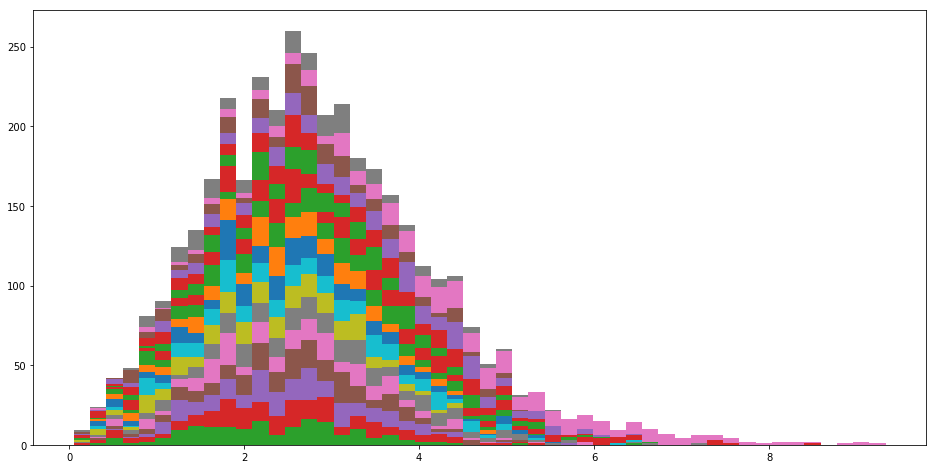

In [17]:
OK = data['SNR'] != 0

toplot = [data['SNR'][0,0, (data['FIELD_ID'] == 14) & (OK[0,0,:]) & (data['SPECTRAL_WINDOW_ID'] == spwid)]
          for spwid in spwids]

H,L,P = pl.hist(toplot, bins=50, stacked=True)

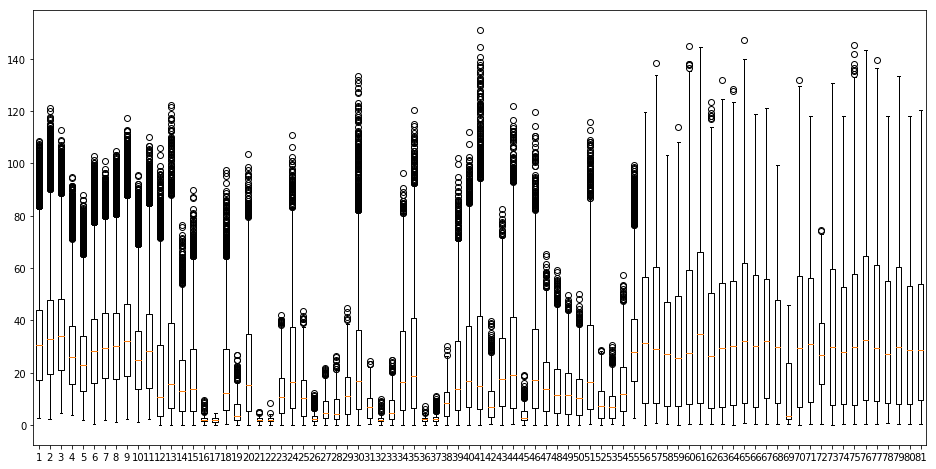

In [18]:
OK = data['SNR'] != 0
fieldOKmask = np.isin(data['FIELD_ID'], okfields)
fieldOKmask = True

toplot = [data['SNR'][0,0, fieldOKmask & (OK[0,0,:]) & (data['ANTENNA1'] == ant)]
          for ant in np.unique(data['ANTENNA1'])]
toplot = [x for x in toplot if len(x) > 0]

_ = pl.boxplot(toplot)

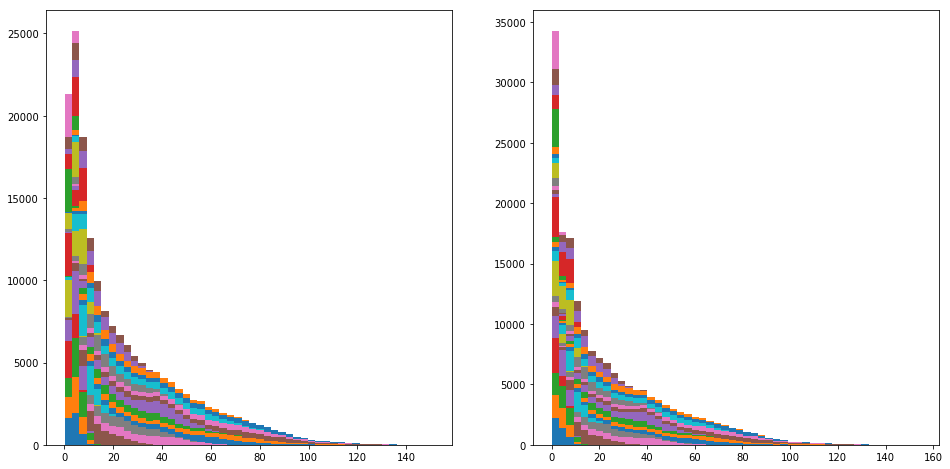

In [19]:
OK = data['SNR'] != 0

toplot = [data['SNR'][0,0, (data['FIELD_ID'] == fid) & (OK[0,0,:])]
          for fid in fids_12m]

pl.subplot(1,2,1)
H,L,P = pl.hist(toplot, bins=50, stacked=True)

toplot = [data['SNR'][1,0, (data['FIELD_ID'] == fid) & (OK[0,0,:])]
          for fid in fids_12m]

pl.subplot(1,2,2)
H,L,P = pl.hist(toplot, bins=50, stacked=True)

Per-field stats:

In [20]:
for fid in fids:
    dat = data['SNR'][1,0, (data['FIELD_ID'] == fid) & (OK[0,0,:])]
    ang = data['ANGLE'][1,0, (data['FIELD_ID'] == fid) & (OK[0,0,:])] * 180/np.pi
    print(f"fid={fid:03d} mean={dat.mean():10.2f} median={np.median(dat):10.2f} std={dat.std():10.2f} angle_mean={ang.mean():10.2f} angle_rms={ang.std():10.2f}")

fid=001 mean=     22.41 median=     22.05 std=      8.35 angle_mean=      0.54 angle_rms=     11.58
fid=002 mean=     10.76 median=     10.64 std=      3.50 angle_mean=      2.66 angle_rms=     12.70
fid=003 mean=     29.87 median=     29.48 std=      9.33 angle_mean=      2.27 angle_rms=      3.65
fid=004 mean=     53.98 median=     52.96 std=     19.83 angle_mean=      0.96 angle_rms=      2.16
fid=005 mean=     28.92 median=     28.05 std=     10.03 angle_mean=      1.14 angle_rms=      3.26
fid=006 mean=     45.95 median=     44.03 std=     15.03 angle_mean=      1.10 angle_rms=      1.80
fid=007 mean=     56.67 median=     53.49 std=     19.91 angle_mean=      0.20 angle_rms=      1.22
fid=008 mean=     12.20 median=     12.02 std=      3.58 angle_mean=      2.32 angle_rms=      4.92
fid=009 mean=     34.65 median=     33.27 std=     10.41 angle_mean=     -0.01 angle_rms=      1.56
fid=010 mean=     26.05 median=     24.04 std=     11.36 angle_mean=     -0.99 angle_rms=      2.56


In [21]:
msmd.open(msfile)
# assumption: np.unique(ant1) is an ordered 0...82 list
antnames = {k:v for k,v in enumerate(msmd.antennanames(np.unique(data['ANTENNA1'])))}
antdist = {k:(msmd.antennaoffset(k)['latitude offset']['value']**2 + msmd.antennaoffset(k)['longitude offset']['value']**2)**0.5
           for k in antnames}
msmd.close()

True

(array([ 5600.,     0.,   360.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   560.]),
 array([  1.70861969e+01,   6.37955598e+07,   1.27591102e+08,
          1.91386645e+08,   2.55182188e+08,   3.18977731e+08,
          3.82773273e+08,   4.46568816e+08,   5.10364359e+08,
          5.74159901e+08,   6.37955444e+08,   7.01750987e+08,
          7.65546529e+08,   8.29342072e+08,   8.93137615e+08,
          9.56933158e+08,   1.02072870e+09,   1.08452424e+09,
          1.14831979e+09,   1.21211533e+09,   1.27591087e+09,
          1.33970641e+09,   1.40350196e+09,   1.46729750e+09,
          1.53109304e+09,   1.59488858e+09,   

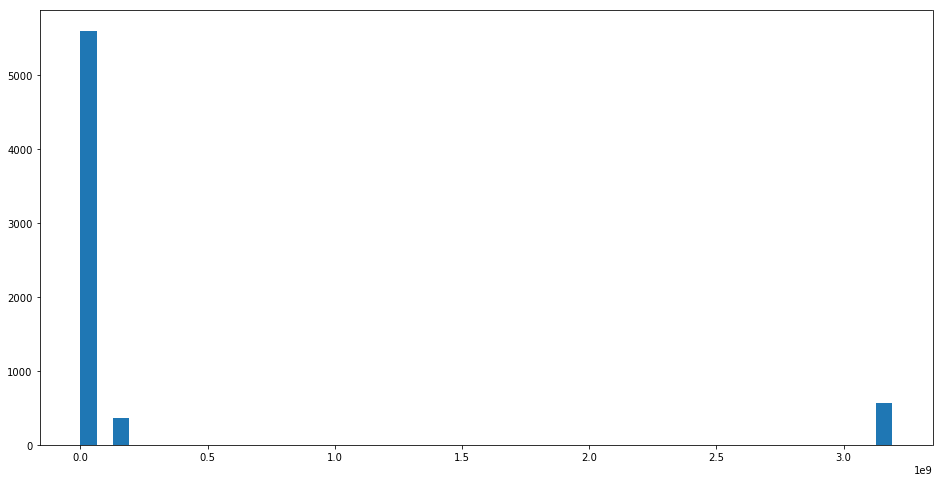

In [22]:
ms.open(msfile)
ms.selectinit(datadescid=0, reset=True)
ms.select(items={'antenna1': 0})
weights = ms.getdata(items=['WEIGHT'])['weight']
ms.close()
pl.hist(weights.ravel(), bins=50)

In [47]:
print("Experiments with just one antenna")
ms.open(msfile)

ms.selectinit(oid, reset=True)
ms.select(items={'antenna1': 0, 'spw': 0}, )
msdata = ms.getdata(items=['WEIGHT', 'ANTENNA1', 'FLAG'])

ms.close()

Experiments with just one antenna


True

In [48]:
{x:msdata[x].shape for x in msdata}

{'antenna1': (3260,), 'flag': (2, 2, 3260), 'weight': (2, 3260)}

In [49]:
np.all(msdata['flag'][0,:,:,] == msdata['flag'][1,:,:])

True

In [50]:
np.all(msdata['flag'][:,0,:,] == msdata['flag'][:,1,:])

True

raise "TODO: figure out what the extra dimensions are in 'flag'.  Are weights applied per polarization or per spectral window?"


Still don't know...

In [53]:
print("TEST")
from astropy import stats
ms.open(msfile)
antwts = {}

for oid in uoids:

    ms.selectinit(oid, reset=True)
    msdata = ms.getdata(items=['WEIGHT', 'ANTENNA1', 'FLAG'])
    for ant in np.unique(msdata['antenna1']):
        selection = msdata['antenna1'] == ant
        # the 'zero' here is a meaningless guess
        flag = msdata['flag'][0,0,selection]
        # True means bad
        weights = msdata['weight'][:,selection]
        antwts[(ant, oid)] = {'flagfrac':flag.sum()/flag.size,
                              'mean': weights[:,~flag].mean(),
                              'median': np.median(weights[:,~flag]),
                              'std': weights[:,~flag].std(),
                              'mad': stats.mad_std(weights[:,~flag]),
                             }
        if antwts[(ant,oid)][flagfrac] < 1:
            print(f"oid {oid} ant {ant}:  {antwts[(ant,oid)]}")
ms.close()

TEST
oid 0 ant 0:  {'flagfrac': 0.7294478527607362, 'mean': 49.523254512388959, 'median': 46.415332794189453, 'std': 16.367019681008614, 'mad': 14.581985307895764}
oid 0 ant 1:  {'flagfrac': 0.647986577181208, 'mean': 36.991546772683201, 'median': 32.269645690917969, 'std': 14.111324582909816, 'mad': 12.750139278374311}
oid 0 ant 2:  {'flagfrac': 1.0, 'mean': nan, 'median': nan, 'std': nan, 'mad': nan}
oid 0 ant 3:  {'flagfrac': 0.73966942148760328, 'mean': 37.578599502926778, 'median': 36.068374633789062, 'std': 7.7668891961453959, 'mad': 7.582443912893881}
oid 0 ant 4:  {'flagfrac': 0.25, 'mean': 40.487302478897234, 'median': 40.914077758789062, 'std': 11.833573039868678, 'mad': 12.582386194561236}
oid 0 ant 5:  {'flagfrac': 0.33924731182795698, 'mean': 45.358709166940386, 'median': 45.808467864990234, 'std': 9.5717138482010284, 'mad': 10.298538329014667}
oid 0 ant 6:  {'flagfrac': 0.31835443037974681, 'mean': 43.617806788827934, 'median': 38.229640960693359, 'std': 14.37049006236777

/lustre/naasc/users/aginsbur/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice.
/lustre/naasc/users/aginsbur/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/lustre/naasc/users/aginsbur/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/lustre/naasc/users/aginsbur/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/lustre/naasc/users/aginsbur/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


oid 0 ant 9:  {'flagfrac': 0.67972972972972978, 'mean': 55.286711125434202, 'median': 54.639305114746094, 'std': 6.9207293934241232, 'mad': 7.5730045852621757}
oid 0 ant 10:  {'flagfrac': 1.0, 'mean': nan, 'median': nan, 'std': nan, 'mad': nan}
oid 1 ant 0:  {'flagfrac': 0.7294478527607362, 'mean': 49.523254512388959, 'median': 46.415332794189453, 'std': 16.367019681008614, 'mad': 14.581985307895764}
oid 1 ant 1:  {'flagfrac': 0.647986577181208, 'mean': 36.991546772683201, 'median': 32.269645690917969, 'std': 14.111324582909816, 'mad': 12.750139278374311}
oid 1 ant 2:  {'flagfrac': 1.0, 'mean': nan, 'median': nan, 'std': nan, 'mad': nan}
oid 1 ant 3:  {'flagfrac': 0.73966942148760328, 'mean': 37.578599502926778, 'median': 36.068374633789062, 'std': 7.7668891961453959, 'mad': 7.582443912893881}
oid 1 ant 4:  {'flagfrac': 0.25, 'mean': 40.487302478897234, 'median': 40.914077758789062, 'std': 11.833573039868678, 'mad': 12.582386194561236}
oid 1 ant 5:  {'flagfrac': 0.33924731182795698, 'm

True

In [41]:
print(msdata['flag'].shape, msdata['weight'].shape, msdata['antenna1'].shape)

(2, 2, 20460) (2, 20460) (20460,)


In [ ]:
msmd.open(msfile)
antobs = {}
for oid in np.unique(data['OBSERVATION_ID']):
    antids = np.unique(data['ANTENNA1'][(data['OBSERVATION_ID']==oid) & (OK[0,0,:])])
    antnames = {k:v for k,v in zip(antids, msmd.antennanames(antids))}

    center = (np.mean([msmd.antennaoffset(k)['latitude offset']['value'] for k in antnames]),
              np.mean([msmd.antennaoffset(k)['longitude offset']['value'] for k in antnames]),)
    print(oid, center)
    
    antdist = {k:((msmd.antennaoffset(k)['latitude offset']['value']-center[0])**2 + (msmd.antennaoffset(k)['longitude offset']['value']-center[1])**2)**0.5
               for k in antnames}
    antloc = {k:(msmd.antennaoffset(k)['latitude offset']['value'], msmd.antennaoffset(k)['longitude offset']['value'])
               for k in antnames}

    antobs[oid] = {'antnames': antnames,
                   'antdist': antdist,
                   'antloc': antloc}
msmd.close()
antdist = {(ant,oid): antobs[oid]['antdist'][ant] for oid in antobs for ant in antobs[oid]['antnames']}
antnames = {(ant,oid): antobs[oid]['antnames'][ant] for oid in antobs for ant in antobs[oid]['antnames']}

In [ ]:
antstats = {}
for oid in np.unique(data['OBSERVATION_ID']):
    for antid in np.unique(data['ANTENNA1']):
        msk = (data['ANTENNA1'] == antid) & (OK[0,0,:]) & fieldOKmask & (data['OBSERVATION_ID'] == oid)
        if np.any(msk) and (antid, oid) in antnames:
            dat = data['SNR'][1,0, msk]
            ang = data['ANGLE'][1,0, msk]
            print(f"antenna={antnames[(antid,oid)]} oid={oid} dist={antdist[(antid,oid)]:6.1f} "
                  f"mean={dat.mean():10.2f} median={np.median(dat):10.2f} "
                  f"std={dat.std():10.2f}  angle_rms={ang.std()*180/np.pi:10.2f}")
            antstats[(antid,oid)] = {'mean':dat.mean(),
                               'median':np.median(dat),
                               'std': dat.std(),
                               'angle_rms': ang.std(),

                              }

In [ ]:
uoids = np.unique(data['OBSERVATION_ID'])
for oid in uoids:
    pl.plot([antdist[(ant,oid)] for ant,_ in antstats  if (ant,oid) in antstats],
            [antstats[(ant,oid)]['mean'] for ant,_ in antstats  if (ant,oid) in antstats],
            'o')
pl.xlabel("Distance from array center (m)")
pl.ylabel("Gaincal SNR")    

In [ ]:
fid = OKfields[0]
nant = len(np.unique(data['ANTENNA1']))
for pol in (0,1):
    pl.figure()
    cnt = 0

    for ii,ant in enumerate(np.unique(data['ANTENNA1'])):
        ax = pl.subplot(4, 4, cnt+1)
        msk = (data['ANTENNA1'] == ant) & (data['FIELD_ID'] == fid) & (OK[pol,0,:]) & (data['SPECTRAL_WINDOW_ID'] == 12)
        ax.plot(data['ANGLE'][pol,0,msk]*180/np.pi)
        ax.set_title(str(ant))
        if np.any(msk):
            cnt += 1
        if cnt > 15:
            break


In [ ]:
fid = OKfields[0]
nant = len(np.unique(data['ANTENNA1']))

for selfcaliter in (1,2,3,4):
    caltable = f'../W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_phase{selfcaliter}_int.cal/'
    tb.open(caltable)
    data = {col: tb.getcol(col) for col in tb.colnames() if col not in ("WEIGHT",)}
    data['ANGLE'] = np.angle(data['CPARAM'])
    tb.close()
    OK = data['SNR'] != 0


    for oid in np.unique(data['OBSERVATION_ID']):
        for pol in (0,):
            pl.figure()
            cnt = 0

            for ii,ant in enumerate(np.unique(data['ANTENNA1'])):
                ax = pl.subplot(4, 4, cnt+1)
                msk = (data['ANTENNA1'] == ant) & (data['FIELD_ID'] == fid) & (OK[pol,0,:]) & (data['OBSERVATION_ID'] == oid)
                spws = data['SPECTRAL_WINDOW_ID'][msk]


                if np.any(msk):
                    cnt += 1
                    for spw in np.unique(spws):
                        smsk = msk & (data['SPECTRAL_WINDOW_ID'] == spw)
                        time = data['TIME'][smsk] 
                        time -= np.min(time)
                        time /= 60
                        ang = data['ANGLE'][pol,0,smsk]*180/np.pi
                        srt = np.argsort(time)
                        #ax.plot(time[srt], ang[srt], '.')
                        ax.plot(ang[srt], '-')
                    ax.set_title(str(ant))
                if cnt > 15:
                    break
            break
        break


In [ ]:
for selfcaliter in (1,2,3,4):
    caltable = f'../W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_phase{selfcaliter}_int.cal/'
    tb.open(caltable)
    data = {col: tb.getcol(col) for col in tb.colnames() if col not in ("WEIGHT",)}
    data['ANGLE'] = np.angle(data['CPARAM'])
    tb.close()
    OK = data['SNR'] != 0
    print(f"\nSelf cal iteration {selfcaliter}")

    for fid in fids:
        dat = data['SNR'][1,0, (data['FIELD_ID'] == fid) & (OK[0,0,:])]
        ang = data['ANGLE'][1,0, (data['FIELD_ID'] == fid) & (OK[0,0,:])] * 180/np.pi
        print(f"fid={fid:03d} mean={dat.mean():10.2f} median={np.median(dat):10.2f} std={dat.std():10.2f} angle_rms={ang.std():10.2f}")